In [1]:
from chrecog.predict import get_session, load_ckpt, cnn_2_reduce, X, is_training, get_pred_one, get_candidate, reshape_with_margin
from data.gen import supported_fonts, supported_weights, get_mat, process_mat
import preproc
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'Greys'

In [2]:
sess = get_session()
load_ckpt(sess, "data/ckpt/161104_2IDR2.ckpt")
test_layer = cnn_2_reduce

ckpt loaded from data/ckpt/161104_2IDR2.ckpt


In [3]:
def generate_img(ch):
    return 1 - process_mat(get_mat(ch)) / 255

def open_img(path, pad=4):
    img = cv2.imread(path)
    processed = preproc.process(img, False)
    return reshape_with_margin(processed, 32, pad) / 255

def test_img(img):
    pred = get_pred_one(img)
    cnnimg = sess.run(test_layer, feed_dict={X:np.array([img]), is_training:False})
    value = get_candidate(pred)
    print(value)
    plt.figure(figsize=(1,1))
    plt.xticks(())
    plt.yticks(())
    plt.imshow(img)
    plt.figure()
    for i in range(cnnimg.shape[3]):
        plt.subplot(4, 4, i + 1)
        plt.xticks(())
        plt.yticks(())
        plt.imshow(np.squeeze(cnnimg[0][:,:,i]), interpolation="none")

(0.72914469, '대')
(0.90094984, '대')


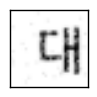

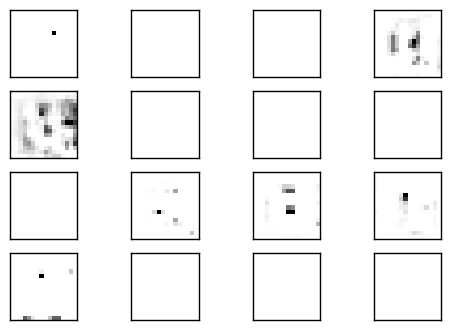

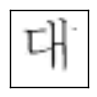

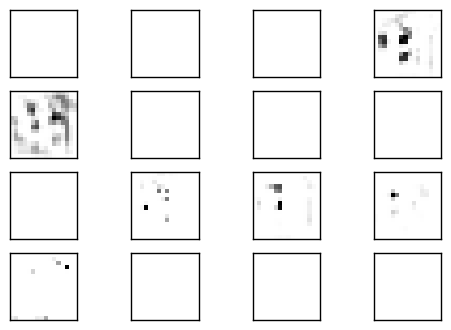

In [4]:
testimg = generate_img(('대'))
openimg = open_img('data/characters/DAE.png')

test_img(testimg)
test_img(openimg)

(0.99999166, '2')
(0.69353408, 'Z')


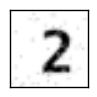

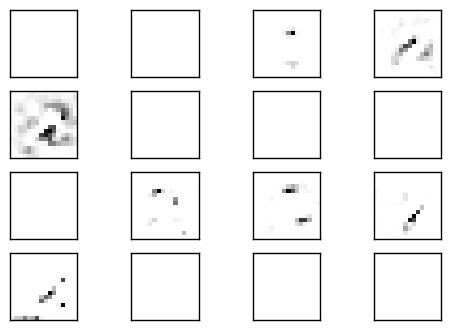

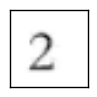

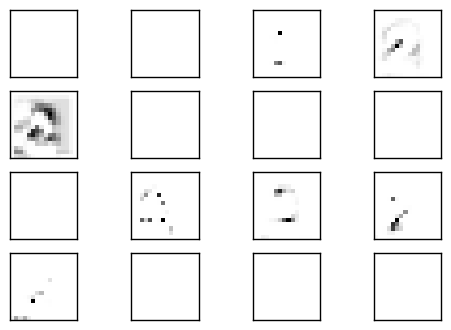

In [5]:
testimg = generate_img(('2'))
openimg = open_img('data/characters/2.png', 0)

test_img(testimg)
test_img(openimg)